In [19]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers

In [14]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

# Load images and convert to Tensor form
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

def load_convert_data():
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'A':
                labels.append(labels_dict['A'])
            elif folder == 'B':
                labels.append(labels_dict['B'])
            elif folder == 'C':
                labels.append(labels_dict['C'])
            elif folder == 'D':
                labels.append(labels_dict['D'])
            elif folder == 'E':
                labels.append(labels_dict['E'])
            elif folder == 'F':
                labels.append(labels_dict['F'])
            elif folder == 'G':
                labels.append(labels_dict['G'])
            elif folder == 'H':
                labels.append(labels_dict['H'])
            elif folder == 'I':
                labels.append(labels_dict['I'])
            elif folder == 'J':
                labels.append(labels_dict['J'])
            elif folder == 'K':
                labels.append(labels_dict['K'])
            elif folder == 'L':
                labels.append(labels_dict['L'])
            elif folder == 'M':
                labels.append(labels_dict['M'])
            elif folder == 'N':
                labels.append(labels_dict['N'])
            elif folder == 'O':
                labels.append(labels_dict['O'])
            elif folder == 'P':
                labels.append(labels_dict['P'])
            elif folder == 'Q':
                labels.append(labels_dict['Q'])
            elif folder == 'R':
                labels.append(labels_dict['R'])
            elif folder == 'S':
                labels.append(labels_dict['S'])
            elif folder == 'T':
                labels.append(labels_dict['T'])
            elif folder == 'U':
                labels.append(labels_dict['U'])
            elif folder == 'V':
                labels.append(labels_dict['V'])
            elif folder == 'W':
                labels.append(labels_dict['W'])
            elif folder == 'X':
                labels.append(labels_dict['X'])
            elif folder == 'Y':
                labels.append(labels_dict['Y'])
            elif folder == 'Z':
                labels.append(labels_dict['Z'])
            elif folder == 'space':
                labels.append(labels_dict['space'])
            elif folder == 'del':
                labels.append(labels_dict['del'])
            elif folder == 'nothing':
                labels.append(labels_dict['nothing'])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.1)
    
    print()
    print('Train data shape =',X_train.shape)
    print('Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [15]:
# Load images from the dataset
x_train, x_test, y_train, y_test = load_convert_data()

LOADING DATA FROM : T | G | X | R | L | H | U | Z | nothing | S | V | Q | O | space | M | C | del | N | K | W | A | Y | D | B | I | E | J | P | F | 
Train data shape = (78300, 64, 64, 3)
Test data shape = (8700, 64, 64, 3)


In [17]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    model.summary()
    
    return model

In [25]:
model = create_model()

earlystop = EarlyStopping(monitor = 'val_loss',
                  min_delta = 0,
                  patience = 2,
                  verbose = 1,
                  restore_best_weights = True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 128)        

In [26]:
ann_model = model.fit(x_train, y_train, batch_size = 64, epochs = 10, 
                      validation_split = 0.1, callbacks=[earlystop])

Train on 70470 samples, validate on 7830 samples
Epoch 1/10
70470/70470 [==============================] - 16s 222us/step - loss: 0.8618 - accuracy: 0.8237 - val_loss: 0.4034 - val_accuracy: 0.9244
Epoch 2/10
70470/70470 [==============================] - 16s 221us/step - loss: 0.1983 - accuracy: 0.9778 - val_loss: 0.1961 - val_accuracy: 0.9752
Epoch 3/10
70470/70470 [==============================] - 15s 211us/step - loss: 0.1749 - accuracy: 0.9815 - val_loss: 0.2751 - val_accuracy: 0.9512
Epoch 4/10
70470/70470 [==============================] - 15s 209us/step - loss: 0.1594 - accuracy: 0.9838 - val_loss: 0.1711 - val_accuracy: 0.9835
Epoch 5/10
70470/70470 [==============================] - 15s 213us/step - loss: 0.1061 - accuracy: 0.9924 - val_loss: 0.1796 - val_accuracy: 0.9793
Epoch 6/10
70470/70470 [==============================] - 15s 218us/step - loss: 0.1917 - accuracy: 0.9852 - val_loss: 0.0661 - val_accuracy: 0.9986
Epoch 7/10
70470/70470 [==============================] -

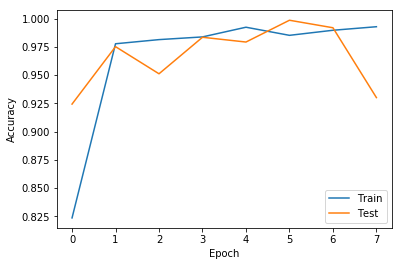

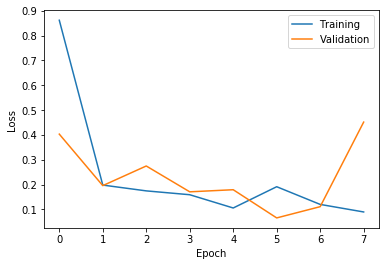

In [29]:
plt.plot(ann_model.history['accuracy'])
plt.plot(ann_model.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(ann_model.history['loss'])
plt.plot(ann_model.history['val_loss'])
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [32]:
print('Final Accuracy: {:.2f}%'.format(ann_model.history['accuracy'][4] * 100))
print('Validation Set Accuracy: {:.2f}%'.format(ann_model.history['val_accuracy'][4] * 100))

Final Accuracy: 99.24%
Validation Set Accuracy: 97.93%


In [ ]:
# Save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")